In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

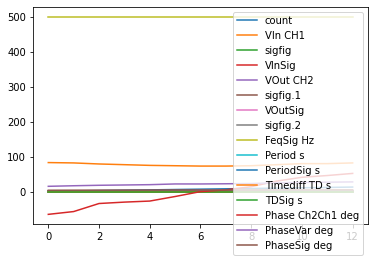

In [2]:
n = pd.read_csv("data.csv")
n.plot()
plt.legend()

In [ ]:
w0 = n["w0_Hz"]

hfont = {'fontname':'Consolas'}
plt.figure()
# plt.style.use('bmh')
w0.plot(kind = "hist", color = 'navy', alpha = 0.5, bins =3, edgecolor = 'k')
plt.title("Hello", **hfont)
plt.ylabel("Count", **hfont)
plt.xlabel("Resonant Freq", **hfont)
plt.xticks(range(0,16000,3000))
plt.savefig("hello3.png", bbox_inches='tight')
plt.legend(['Resonant Frequencies'])


In [ ]:
def VarRealResFreq(omega, ErrOmega, phi, varphi):
    """
    Inputs require base unit values

        Function takes: 
        - Freqency, error in freq ~ Std 
        - Phase angle, Variance
        - R thevenin, Variance 
        - Inductance, Variance

        Returns:
        - Variance of the Real resonance frequency
        
    Formal formulas found in: MdFormulas.ipynb
    """    

    #Remove
    L =15E-3
    varL =3E-3
    RT = 203
    varRT =5

    
    # Convert phi to rad 
    phi = (phi*np.pi)/180
        
    t1 =2*L*omega - np.tan(phi)*RT
    # denominator used several times = t2
    t2 = 2*np.sqrt(L)*np.sqrt(L*omega**2-np.tan(phi)*RT*omega)
    t3= t1/t2
    term1 = (t3**2)*ErrOmega**2

    t4 = 1/np.cos(phi) #secant
    t5 = t4**2*RT*omega
    t6 = t5/t2
    term2 = (t6**2)*varphi

    t7 = np.tan(phi)*omega
    t8 = t7/t2
    term3 = (t8**2)*varRT
    
    t9 = np.tan(phi)*RT*omega
    t10 = 2*L**(3/2)*np.sqrt(L*omega**2-np.tan(phi)*RT*omega)
    t11 = t9/t10
    term4 = (t11**2)*varL

    varrealresfreq = term1 + term2 + term3 + term4
    v = varrealresfreq

    return v  

In [ ]:
n = pd.read_csv('data.csv')
a,b,c,d = n['Fequency_Hz'], n['FeqErr_Hz'], n['Phase_Ch2Ch1_deg'], n['PhaseVar_deg']
a,b,c,d = a.to_numpy(dtype=float, na_value=0), b.to_numpy(dtype=float, na_value=5), c.to_numpy(dtype=float, na_value=5), d.to_numpy(dtype=float, na_value=5)
print(a)


[11000. 12000. 12300. 12900. 13300. 13700.]


In [ ]:
varRfeq = VarRealResFreq(a,b,c,d)
print(varRfeq)

[2.91604050e+09 2.33415982e+08 1.81593487e+08 1.13422261e+06
 5.87612792e+07 1.84213399e+08]


Text(0.5, 1.0, 'Hello')

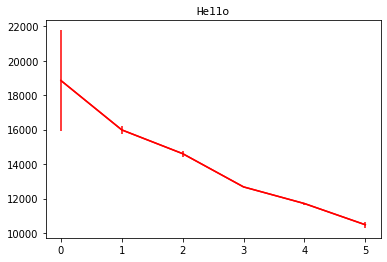

In [ ]:
hfont = {'fontname':'Consolas'}
plt.figure()
w = n['w0_Hz']
w =w.to_numpy(dtype=float)
x = range(len(w))
# n['w0_Hz'].plot(alpha=0.5, yerr= varRfeq*10**(-6), color ='red')
plt.plot(w, color ='red')
plt.errorbar(x,w,yerr= varRfeq*10**(-6), color ='red')
plt.title("Hello", **hfont)

# plt.savefig("hello3.png", bbox_inches='tight')



<AxesSubplot:>

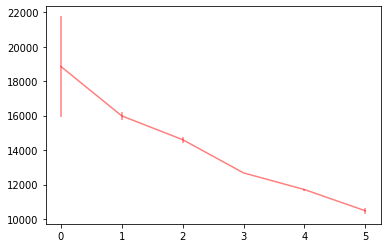

In [ ]:
#  n['w0_Hz'].plot(alpha=0.5, yerr= varRfeq*10**(-6), color ='red')